# Introduction

A cold atom experimental setup on an optical table is a useful metaphor for the philosophy underlying the cold-atom library. In such an experimental apparatus there are expensive, complicated gadgets like lasers, detectors, vacuum pumps, etc. Usually these gadgets are not chosen so as to maximize their performance for a specific experiment. Rather they are reasonably versatile and general so that they can be repurposed for different experiments. Of course this saves cost but more importantly it allows experimenters to adapt to new insights that are gained only once construction of the apparatus has begun or once the experiment is underway. This is a recognition of the reality that it is impossible to fully anticipate all details of an experiment and to have a perfect plan ahead of time. A certain amount of on the fly learning and adaptation to new information is necessary.

The expensive and sophisticated gadgets are connected together by a large number of highly standardized, very general, and typically low cost components: optical fibers, various types of cables, screws, bolts, mounts, wire, duct tape etc. The use of these very general, low cost interfaces is what allows students in the field of cold atoms to get to the point where they can take data and carry out physics research in a matter of years (sometimes even months).

The cold-atom library aims to emulate this approach for computational research in cold atoms. The library itself provides powerful data structures, algorithms, and implementations for specialized tasks (e.g. particle tracking, laser cooling, etc). In our analogy these capabilities correspond to lasers and other equipment. The interface between these capabilities is based on widely used standard libraries such as numpy and matplotlib and the programming language python itself.

This architecture is in deliberate contrast to simulation software that is specialized for a rather specific and narrow application domain (e.g. fusion research). Such applications are designed and developed over many years and decades and simulation runs are often carried out on super computers using batch systems with turnaround times of hours or days. Granted, for many of the application areas where these traditional computational solutions are brought to bear this approach is the only practical one.

But in our opinion it is a poor fit for cold atom research where flexibility, agility, and interactivity are more important than application performance. Of course this is practical only because the computational needs in the flavor of atomic physics we're targeting are much less stringent than in traditional areas of computational science.

This notebook illustrates some of the most basic concepts of the cold atoms library. We show how to represent an ensemble of particles and how to simulate their ballistic expansion.


# Ballistic expansion of an ensemble of cold atoms

First we need to include a few libraries. As mentioned in the introduction, the coldatoms library uses numpy to represent most of its data. matplotlib is our go to solution for visualization

In [1]:
import coldatoms
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Particles are represented by their positions and momenta. It is possible to consider particles in reduced dimensions (e.g. 1D or 2D) but cold-atoms is most at home in three spatial dimensions. This is because cold-atoms is at its heart a mesh-free library where the cost of higher dimensions (e.g. 3D vs 2D) is rather low.

As an example, lets consider a bunch of particles distributed according to a Gaussian density distribution and a Maxwell-Boltzmann velocity distribution:

In [2]:
positions = np.random.normal(size=(1000, 3))
momenta = np.random.normal(size=positions.shape)

In cold-atoms it is most natural to consider whole ensembles rather than individual particles. This is by design. Dealing with whole ensembles allows us to construct high performance building blocks out of which simulations can then be assembled. If the library worked at the level of individual particles it would be impossible to amortize the cost of some of the glue code needed to tie the different components together. The result would be slow performance.

cold-atoms does not prescribe a specific data type or class for the representation of particle data (This may change). For our example, we could have chosen to combine the positions and momenta in a single 1000x6 numpy array.

If we let these particles evolve without any forces being applied to them we get ballistic expansion. The following figure shows the initial density distribution.

In [3]:
def plot_positions(ax, x, y, x_range, y_range):
    ax.plot(positions[:,0], positions[:,1],'.',markersize=1)
    ax.set_xlim(-x_range, x_range)
    ax.set_ylim(-y_range, y_range)
    ax.set_aspect(1)
    
fig = plt.figure()
subplots = [plt.subplot(131), plt.subplot(132), plt.subplot(133)]

for ax in subplots:
    plot_positions(ax, positions[:,0], positions[:, 1], 10, 10)
    coldatoms.push(1.0, positions, momenta)
    ax.set_xlabel(r'$x$')

subplots[0].set_ylabel(r'$y$')
subplots[1].get_yaxis().set_ticks([])
subplots[2].get_yaxis().set_ticks([])
fig.tight_layout()

<IPython.core.display.Javascript object>

NameError: name 'accelerators' is not defined

# Some basic performance estimates

In [39]:
import time

In [40]:
def time_ballistic(n):
    positions = np.random.normal(size=(n, 3))
    momenta = np.random.normal(size=positions.shape)
    t = time.time()
    num_iter = 10
    for i in range(num_iter):
        coldatoms.push(0.1, positions, momenta)
    elapsed = time.time() - t
    return elapsed / num_iter

In [42]:
def flops(n):
    return 2 * 2 * n * 3

In [43]:
def bw(n):
    return 2 * np.dtype('float64').itemsize * n

In [44]:
import math

In [52]:
nptcls = np.array([1000*1.5**e for e in range(0, 15)])
times = np.array([time_ballistic(math.floor(n)) for n in nptcls])
gflops = flops(nptcls) / times / (2.0**30)
gbytes = bw(nptcls) / times / (2.0**30)

<IPython.core.display.Javascript object>


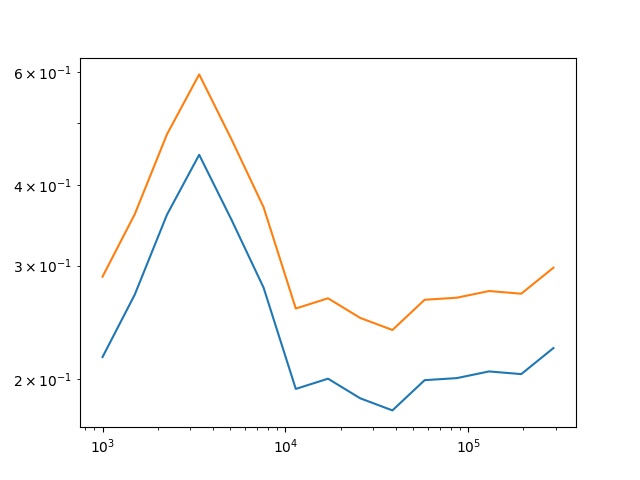

In [53]:
plt.figure()
plt.loglog(nptcls, gflops)
plt.loglog(nptcls, gbytes);